<a href="https://colab.research.google.com/github/shaimaeid/Tensorflow/blob/master/Pneumonia_classification_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image

# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Dataset
Dataset is taken from the "Chest X-Ray Images (Pneumonia)" provided by Kaggle (https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia) The files of the dataset in use is hosted at my google drive which is mounted to this environment.

In [ ]:
mainDIR = os.listdir('/content/drive/My Drive/data/')
print(mainDIR)

['train', '.ipynb_checkpoints', 'test', 'val']


In [ ]:
train_folder= '/content/drive/My Drive/data/train/'
val_folder = '/content/drive/My Drive/data/val/'
test_folder = '/content/drive/My Drive/data/test/'

In [ ]:
# train 
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

In [ ]:
#Normal pic 
train_n_dir=os.listdir(train_n)
print(len(train_n_dir))
print(train_n_dir[:10])
rand_norm= np.random.randint(0,len(train_n_dir))
norm_pic = train_n_dir[rand_norm]
print('normal picture title: ',norm_pic)

norm_pic_address = train_n+norm_pic

#Pneumonia
train_p_dir=os.listdir(train_p)
print(len(train_p_dir))
print(train_p_dir[:10])
rand_p = np.random.randint(0,len(train_p_dir))

sic_pic =  train_p_dir[rand_norm]
sic_address = train_p+sic_pic
print('pneumonia picture title:', sic_pic)



713
['IM-0288-0001.jpeg', 'IM-0314-0001.jpeg', 'IM-0298-0001.jpeg', 'IM-0313-0001.jpeg', 'IM-0312-0001.jpeg', 'IM-0297-0001.jpeg', 'IM-0307-0001.jpeg', 'IM-0305-0001.jpeg', 'IM-0327-0001.jpeg', 'IM-0363-0001.jpeg']
normal picture title:  IM-0243-0001.jpeg
1357
['person440_bacteria_1898.jpeg', 'person405_virus_805.jpeg', 'person443_bacteria_1923.jpeg', 'person435_virus_885.jpeg', 'person458_bacteria_1952.jpeg', 'person440_bacteria_1897.jpeg', 'person427_bacteria_1868.jpeg', 'person422_virus_868.jpeg', 'person400_bacteria_1807.jpeg', 'person401_virus_795.jpeg']
pneumonia picture title: person360_virus_739.jpeg


Text(0.5, 1.0, 'Pneumonia')

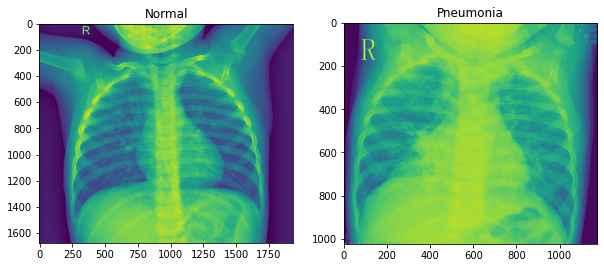

In [ ]:
# Load the images
norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)

#Let's plt these images
f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load)
a2.set_title('Pneumonia')

In [ ]:
# let's build the CNN model

cnn = Sequential()

#Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))

#Pooling
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# 2nd Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu"))

# 2nd Pooling layer
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# Flatten the layer
cnn.add(Flatten())

# Fully Connected Layers
cnn.add(Dense(activation = 'relu', units = 512))
cnn.add(Dense(activation = 'sigmoid', units = 1))


# Image change through CNN layers
we resized images to be 64X64 pixels, at the first convolution we lost 2 pixel (padding) then the quartered pixels at pooling layer so at the first convlution and pooling the image compressed to 31X31 pixels

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [ ]:
from tensorflow.keras.optimizers import RMSprop

cnn.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

## Preprocessing Images
Images on the dataset might come in all shapes and
sizes and unfortunately for training a neural network,
the input data all has to be the same size,
so the images will need to be
resized to make them consistent.
in the next code bloack, I use ImageDataGenerator class to rescale images, label images and feed them in batches to my CNN. 
The flow_from_directory method read the directory structure and turn it into labels. we have 2 folders inside our trianing folder: NORMAL and PNEUMONIA and these will be our binary classes.

In [ ]:
# Fitting the CNN to the images
# The function ImageDataGenerator augments your image by iterating through image as your CNN is getting ready to process that image

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)  #Image normalization.
print("Traning Set")

train_generator = train_datagen.flow_from_directory('/content/drive/My Drive/data/train',
                                                 target_size = (64, 64),
                                                 batch_size = 128,
                                                 class_mode = 'binary')
print("\nValidation Set")
validation_generator = test_datagen.flow_from_directory('/content/drive/My Drive/data/val/',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

print("\nTest Set")
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/data/test/',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Traning Set
Found 2070 images belonging to 2 classes.

Validation Set
Found 16 images belonging to 2 classes.

Test Set
Found 624 images belonging to 2 classes.


In [ ]:
print(train_generator.class_indices)

{'NORMAL': 0, 'PNEUMONIA': 1}


# Training the Model

In [ ]:
history = cnn.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=16,
      verbose=1,
      validation_data = test_set,
      validation_steps=8)

Epoch 1/16
8/8 [==============================] - 15s 2s/step - loss: 0.1324 - accuracy: 0.9466 - val_loss: 0.2279 - val_accuracy: 0.9023
Epoch 2/16
8/8 [==============================] - 17s 2s/step - loss: 0.1391 - accuracy: 0.9424 - val_loss: 0.2052 - val_accuracy: 0.9141
Epoch 3/16
8/8 [==============================] - 15s 2s/step - loss: 0.1703 - accuracy: 0.9292 - val_loss: 0.2563 - val_accuracy: 0.8789
Epoch 4/16
8/8 [==============================] - 17s 2s/step - loss: 0.1612 - accuracy: 0.9268 - val_loss: 0.3491 - val_accuracy: 0.8438
Epoch 5/16
8/8 [==============================] - 17s 2s/step - loss: 0.1148 - accuracy: 0.9473 - val_loss: 0.2596 - val_accuracy: 0.9023
Epoch 6/16
8/8 [==============================] - 17s 2s/step - loss: 0.1939 - accuracy: 0.9161 - val_loss: 0.4033 - val_accuracy: 0.8438
Epoch 7/16
8/8 [==============================] - 15s 2s/step - loss: 0.1171 - accuracy: 0.9499 - val_loss: 0.3629 - val_accuracy: 0.8828
Epoch 8/16
8/8 [==================

Running the Model

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(64, 64))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = cnn.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a PNEUMONIA")
  else:
    print(fn + " is a NORMAL")

Saving 4.PNG to 4 (1).PNG
[1.]
4.PNG is a PNEUMONIA


# Visualization

In [ ]:
history.history

{'accuracy': [0.9466230869293213,
  0.9423828125,
  0.929193913936615,
  0.9267578125,
  0.947265625,
  0.9161220192909241,
  0.9498910903930664,
  0.9575163125991821,
  0.943359375,
  0.9287109375,
  0.9619140625,
  0.95703125,
  0.94921875,
  0.900390625,
  0.9553377032279968,
  0.958984375],
 'loss': [0.13236388564109802,
  0.13907650113105774,
  0.17034812271595,
  0.16122564673423767,
  0.11483876407146454,
  0.19387947022914886,
  0.11714772880077362,
  0.11297238618135452,
  0.13204611837863922,
  0.1688002645969391,
  0.0960097461938858,
  0.11979630589485168,
  0.13626396656036377,
  0.24157705903053284,
  0.1283557415008545,
  0.09961554408073425],
 'val_accuracy': [0.90234375,
  0.9140625,
  0.87890625,
  0.84375,
  0.90234375,
  0.84375,
  0.8828125,
  0.90625,
  0.9140625,
  0.87109375,
  0.90625,
  0.890625,
  0.92578125,
  0.91015625,
  0.84375,
  0.8984375],
 'val_loss': [0.22792808711528778,
  0.20517213642597198,
  0.2562571167945862,
  0.3491039276123047,
  0.2595923

In [ ]:
test_accu = cnn.evaluate(test_set,steps=16)

 20/624 [..............................] - 6s 317ms/step - loss: 0.2317 - accuracy: 0.8942


In [ ]:
print('The testing accuracy is :',test_accu[1]*100, '%')

The testing accuracy is : 89.42307829856873 %


In [ ]:


Y_pred = cnn.predict_generator(test_set, 20)
y_pred = np.argmax(Y_pred, axis=1)
confusion_matrix(test_set.classes, y_pred)



array([[234,   0],
       [390,   0]])

In [ ]:
max(y_pred)

0

[0.9466230869293213, 0.9423828125, 0.929193913936615, 0.9267578125, 0.947265625, 0.9161220192909241, 0.9498910903930664, 0.9575163125991821, 0.943359375, 0.9287109375, 0.9619140625, 0.95703125, 0.94921875, 0.900390625, 0.9553377032279968, 0.958984375]


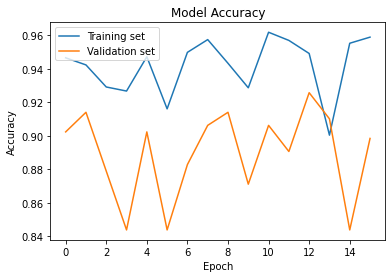

In [ ]:
# Accuracy 
print(history.history['accuracy'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

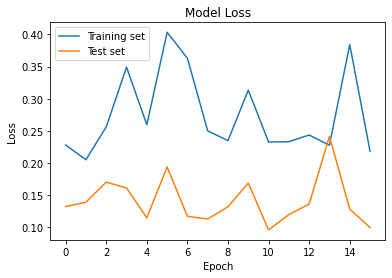

In [ ]:
# Loss 

plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.show()